In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from keras.datasets import fashion_mnist
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras import optimizers

import tensorflow as tf

# Глобальная фиксация весов
import random
import os

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)

import warnings
warnings.filterwarnings('ignore')

C:\Users\bryzginka\AppData\Roaming\Python\Python311\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## Загрузка данных

In [2]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

In [3]:
print(f'Объем трейна: {X_train.shape[0]} изображений')
print(f'Объем теста: {X_test.shape[0]} изображений')

Объем трейна: 60000 изображений
Объем теста: 10000 изображений


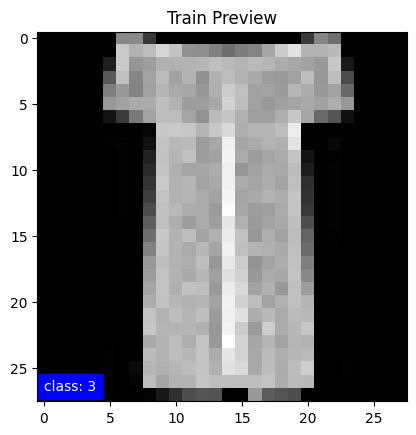

In [4]:
i = np.random.randint(0, X_test.shape[0])

plt.imshow(X_train[i], cmap='gray')
plt.text(0, 26.7, f'class: {y_train_labels[i]}', color='white', backgroundcolor='blue')
plt.title('Train Preview')

plt.show()

Расшифровка классов:
* 0 T-shirt/top – футболка
* 1 Trouser – брюки
* 2 Pullover – свитер
* 3 Dress – платье
* 4 Coat – пальто
* 5 Sandal – сандалия
* 6 Shirt – рубашка
* 7 Sneaker – кроссовок
* 8 Bag – сумка
* 9 Ankle boot – сапог

## Препроцессинг

### Нормализация данных

In [5]:
X_train.max()

np.uint8(255)

In [6]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

X_train_scaled.max(), X_test_scaled.max()

(np.float64(1.0), np.float64(1.0))

### Изменение размерности

In [7]:
X_train_scaled.shape, X_test_scaled.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
X_train_scaled_reshaped = X_train_scaled.reshape((-1, 28 * 28))
X_test_scaled_reshaped = X_test_scaled.reshape((-1, 28 * 28))

In [9]:
X_train_scaled_reshaped.shape, X_test_scaled_reshaped.shape

((60000, 784), (10000, 784))

### Бинаризация

In [10]:
y_train_binarized = to_categorical(y_train_labels)
y_test_binarized = to_categorical(y_test_labels)

## Проектирование архитектуры

### Двуслойные сети с разным количеством нейронов

#### Вариант 1. Скрытый слой 128 нейронов, выходной слой 10 нейронов.

In [11]:
two_layer_model_v128 = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='sigmoid')
])
two_layer_model_v128.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

#### Вариант 2. Скрытый слой 256 нейронов, выходной слой 10 нейронов.

In [12]:
two_layer_model_v256 = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='sigmoid')
])
two_layer_model_v256.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,450 (271.29 KB)

 Trainable params: 69,450 (271.29 KB)

 Non-trainable params: 0 (0.00 B)

### Многослойные сети

#### Вариант 1. Трехслойная сеть. Скрытый слой 256 нейронов, скрытый слой 128 нейронов, выходной слой 10 нейронов.

In [13]:
three_layer_model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='sigmoid')
])
three_layer_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,066 (394.79 KB)

 Trainable params: 101,066 (394.79 KB)

 Non-trainable params: 0 (0.00 B)

#### Вариант 2. Пятислойная сеть. Скрытый слой 512 нейронов, скрытый слой 256 нейронов, скрытый слой 128 нейронов, скрытый слой 64 нейрона, выходной слой 10 нейронов.

In [14]:
five_layer_model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='sigmoid')
])
five_layer_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,034 (972.79 KB)

 Trainable params: 249,034 (972.79 KB)

 Non-trainable params: 0 (0.00 B)

## Компиляция моделей

In [15]:
# Двуслойные модели
two_layer_model_v128.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

two_layer_model_v256.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']    
)

In [16]:
# Многослойные модели
three_layer_model.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

five_layer_model.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']    
)

## Обучение моделей

In [17]:
early_stoping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

### Двуслойные сети с разным количеством нейронов

#### Вариант 1. Скрытый слой 128 нейронов, выходной слой 10 нейронов.

In [18]:
two_layer_model_v128_history = two_layer_model_v128.fit(
    X_train_scaled_reshaped,
    y_train_binarized,
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_data=(X_test_scaled_reshaped, y_test_binarized),
    callbacks=[early_stoping]
)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.7390 - loss: 0.7679 - val_accuracy: 0.7815 - val_loss: 0.5890
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.8249 - loss: 0.5024 - val_accuracy: 0.8063 - val_loss: 0.5324
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - accuracy: 0.8402 - loss: 0.4570 - val_accuracy: 0.8190 - val_loss: 0.5025
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.8500 - loss: 0.4306 - val_accuracy: 0.8277 - val_loss: 0.4805
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.8554 - loss: 0.4121 - val_accuracy: 0.8332 - val_loss: 0.4652
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.8603 - loss: 0.3972 - val_accuracy: 0.8370 - val_loss: 0.4533
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.8642 - loss: 0.3848 - val_accuracy: 0.8419 - val_loss: 0.4435
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 

#### Вариант 2. Скрытый слой 256 нейронов, выходной слой 10 нейронов.

In [19]:
two_layer_model_v256_history = two_layer_model_v256.fit(
    X_train_scaled_reshaped,
    y_train_binarized,
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_data=(X_test_scaled_reshaped, y_test_binarized),
    callbacks=[early_stoping]
)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - accuracy: 0.7319 - loss: 0.7964 - val_accuracy: 0.7650 - val_loss: 0.6206
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.8200 - loss: 0.5174 - val_accuracy: 0.8004 - val_loss: 0.5489
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.8378 - loss: 0.4657 - val_accuracy: 0.8173 - val_loss: 0.5113
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.8476 - loss: 0.4364 - val_accuracy: 0.8268 - val_loss: 0.4873
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.8547 - loss: 0.4158 - val_accuracy: 0.8369 - val_loss: 0.4692
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - accuracy: 0.8599 - loss: 0.4000 - val_accuracy: 0.8397 - val_loss: 0.4562
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.8642 - loss: 0.3870 - val_accuracy: 0.8429 - val_loss: 0.4447
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 

### Многослойные модели

#### Вариант 1. Трехслойная модель.

In [20]:
three_layer_model_history = three_layer_model.fit(
    X_train_scaled_reshaped,
    y_train_binarized,
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_data=(X_test_scaled_reshaped, y_test_binarized),
    callbacks=[early_stoping]
)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7382 - loss: 0.7800 - val_accuracy: 0.7678 - val_loss: 0.6168
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.8258 - loss: 0.4974 - val_accuracy: 0.8038 - val_loss: 0.5333
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8430 - loss: 0.4480 - val_accuracy: 0.8210 - val_loss: 0.4927
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.8534 - loss: 0.4179 - val_accuracy: 0.8323 - val_loss: 0.4664
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.8603 - loss: 0.3968 - val_accuracy: 0.8400 - val_loss: 0.4480
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8651 - loss: 0.3803 - val_accuracy: 0.8457 - val_loss: 0.4351
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8693 - loss: 0.3665 - val_accuracy: 0.8480 - val_loss: 0.4255
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8726 - l

#### Вариант 2. Пятислойная модель.

In [21]:
five_layer_model_history = five_layer_model.fit(
    X_train_scaled_reshaped,
    y_train_binarized,
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_data=(X_test_scaled_reshaped, y_test_binarized),
    callbacks=[early_stoping]
)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7143 - loss: 0.8210 - val_accuracy: 0.7674 - val_loss: 0.6264
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8251 - loss: 0.4929 - val_accuracy: 0.8022 - val_loss: 0.5391
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8432 - loss: 0.4396 - val_accuracy: 0.8185 - val_loss: 0.4969
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8533 - loss: 0.4085 - val_accuracy: 0.8294 - val_loss: 0.4724
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8604 - loss: 0.3866 - val_accuracy: 0.8331 - val_loss: 0.4550
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8665 - loss: 0.3694 - val_accuracy: 0.8386 - val_loss: 0.4374
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8701 - loss: 0.3553 - val_accuracy: 0.8433 - val_loss: 0.4261
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8749 - loss: 0

## Валидация и сопоставление моделей

### Двуслойные сети с разным количеством нейронов

#### Сравнение метрик

In [22]:
two_layer_model_v128_loss, two_layer_model_v128_metric = two_layer_model_v128.evaluate(X_test_scaled_reshaped, y_test_binarized, batch_size=32)
two_layer_model_v256_loss, two_layer_model_v256_metric = two_layer_model_v256.evaluate(X_test_scaled_reshaped, y_test_binarized, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.8693 - loss: 0.3649
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.7650 - loss: 0.6206


In [23]:
two_layer_model_v128_train_accuracy = two_layer_model_v128_history.history['accuracy']
two_layer_model_v128_test_accuracy = two_layer_model_v128_history.history['val_accuracy']

two_layer_model_v256_train_accuracy = two_layer_model_v256_history.history['accuracy']
two_layer_model_v256_test_accuracy = two_layer_model_v256_history.history['val_accuracy']

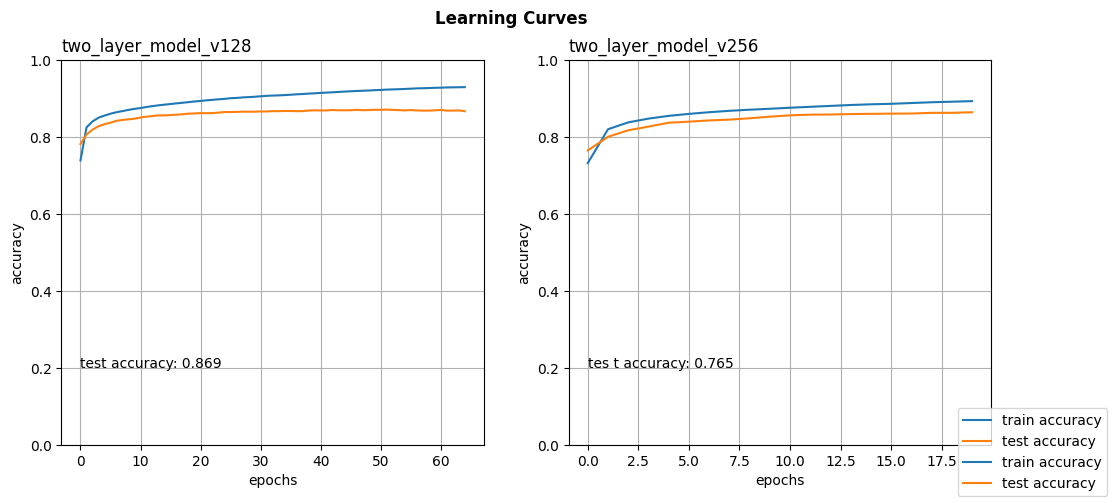

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle('Learning Curves', fontweight='bold')

ax[0].plot(two_layer_model_v128_train_accuracy, label='train accuracy')
ax[0].plot(two_layer_model_v128_test_accuracy, label='test accuracy')
ax[0].grid()
ax[0].text(0, 0.2,f'test accuracy: {round(two_layer_model_v128_metric, 3)}')
ax[0].set_title('two_layer_model_v128', loc='left')
ax[0].set_ylim(0, 1)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(two_layer_model_v256_train_accuracy, label='train accuracy')
ax[1].plot(two_layer_model_v256_test_accuracy, label='test accuracy')
ax[1].grid()
ax[1].text(0, 0.2,f'tes t accuracy: {round(two_layer_model_v256_metric, 3)}')
ax[1].set_title('two_layer_model_v256', loc='left')
ax[1].set_ylim(0, 1)
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
fig.legend(loc='lower right')

plt.show()

#### Оценка работы

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


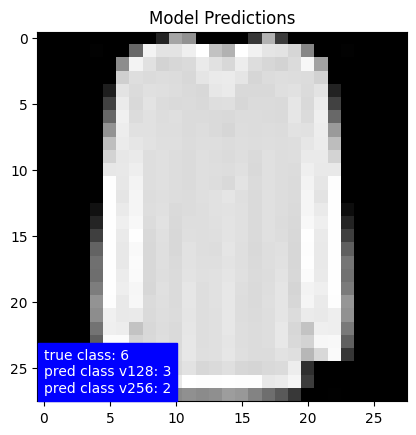

In [25]:
i = np.random.randint(0, X_test.shape[0])
sample = X_test_scaled_reshaped[i][None]

prediction_two_layer_model_v128 = two_layer_model_v128.predict(sample)
prediction_two_layer_model_v256 = two_layer_model_v256.predict(sample)

prediction_class_two_layer_model_v128 = np.argmax(prediction_two_layer_model_v128, axis=1)
prediction_class_two_layer_model_v256 = np.argmax(prediction_two_layer_model_v256, axis=1)

plt.imshow(X_test[i], cmap='gray')
plt.text(
    0,
    26.8,
    f'true class: {y_test_labels[i]}'
    f'\npred class v128: {prediction_class_two_layer_model_v128[0]}'
    f'\npred class v256: {prediction_class_two_layer_model_v256[0]}', 
    color='white',
    backgroundcolor='blue'
)
plt.title('Model Predictions')

plt.show()

#### Вывод по сравнению двуслойных моделей

Accuracy на тесте модели с 128 нейронами выше, чем модели с 256 нейронами, но первая модель обучалась 65 эпох, а вторая 20.

### Многослойные модели

#### Сравнение метрик

In [26]:
three_layer_model_loss, three_layer_model_metric = three_layer_model.evaluate(X_test_scaled_reshaped, y_test_binarized, batch_size=1024)
five_layer_model_loss, five_layer_model_metric = five_layer_model.evaluate(X_test_scaled_reshaped, y_test_binarized, batch_size=1024)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7678 - loss: 0.6168 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7674 - loss: 0.6264 


In [27]:
three_layer_model_train_accuracy = three_layer_model_history.history['accuracy']
three_layer_model_test_accuracy = three_layer_model_history.history['val_accuracy']

five_layer_model_train_accuracy = five_layer_model_history.history['accuracy']
five_layer_model_test_accuracy = five_layer_model_history.history['val_accuracy']

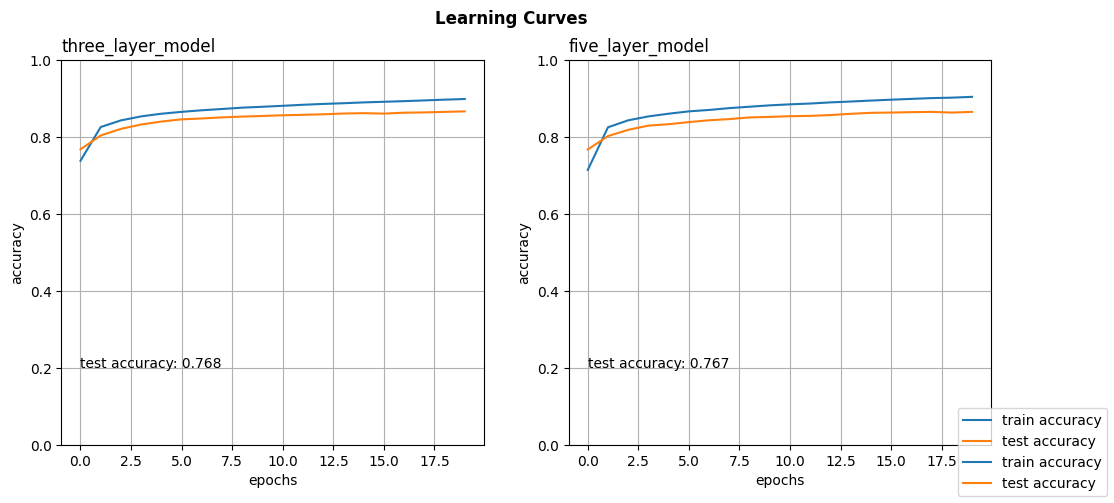

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle('Learning Curves', fontweight='bold')

ax[0].plot(three_layer_model_train_accuracy, label='train accuracy')
ax[0].plot(three_layer_model_test_accuracy, label='test accuracy')
ax[0].grid()
ax[0].text(0, 0.2,f'test accuracy: {round(three_layer_model_metric, 3)}')
ax[0].set_title('three_layer_model', loc='left')
ax[0].set_ylim(0, 1)
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(five_layer_model_train_accuracy, label='train accuracy')
ax[1].plot(five_layer_model_test_accuracy, label='test accuracy')
ax[1].grid()
ax[1].text(0, 0.2,f'test accuracy: {round(five_layer_model_metric, 3)}')
ax[1].set_title('five_layer_model', loc='left')
ax[1].set_ylim(0, 1)
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
fig.legend(loc='lower right')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


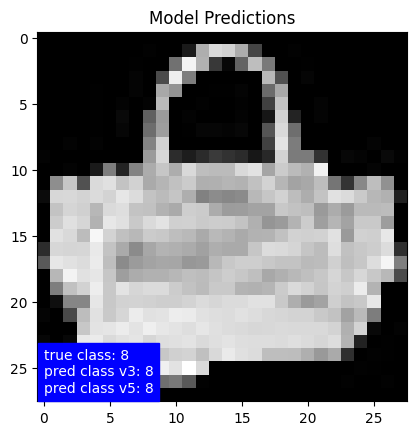

In [29]:
i = np.random.randint(0, X_test.shape[0])
sample = X_test_scaled_reshaped[i][None]

prediction_three_layer_model = three_layer_model.predict(sample)
prediction_five_layer_model = five_layer_model.predict(sample)

prediction_three_layer_model = np.argmax(prediction_three_layer_model, axis=1)
prediction_five_layer_model = np.argmax(prediction_five_layer_model, axis=1)

plt.imshow(X_test[i], cmap='gray')
plt.text(
    0,
    26.8,
    f'true class: {y_test_labels[i]}'
    f'\npred class v3: {prediction_three_layer_model[0]}'
    f'\npred class v5: {prediction_five_layer_model[0]}', 
    color='white',
    backgroundcolor='blue'
)
plt.title('Model Predictions')

plt.show()

#### Вывод по сравнению многослойных моделей

Метрики качества (accuracy) достаточно близки на трейне и на тесте для двух моделей (3 и 5 слоев). Явного преимущество какой-либо модели не выявлено.

### Сравнение алгоритмов оптимизации

Для сравнения будем использовать трехслойную модель с оптимизацией SGD и Adam.

In [30]:
models = {}

Epoch 1/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2265 - loss: 2.1948 - val_accuracy: 0.4051 - val_loss: 2.0544
Epoch 2/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5191 - loss: 1.8738 - val_accuracy: 0.5920 - val_loss: 1.6759
Epoch 3/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6227 - loss: 1.4956 - val_accuracy: 0.6252 - val_loss: 1.3418
Epoch 4/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6482 - loss: 1.2228 - val_accuracy: 0.6480 - val_loss: 1.1356
Epoch 5/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6685 - loss: 1.0586 - val_accuracy: 0.6660 - val_loss: 1.0128
Epoch 6/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6853 - loss: 0.9571 - val_accuracy: 0.6836 - val_loss: 0.9338
Epoch 7/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6978 - loss: 0.8889 - val_accuracy: 0.6965 - val_loss: 0.8789
Epoch 8/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7102 - loss: 0.8399 - val_accuracy: 0.7065 - val_loss:

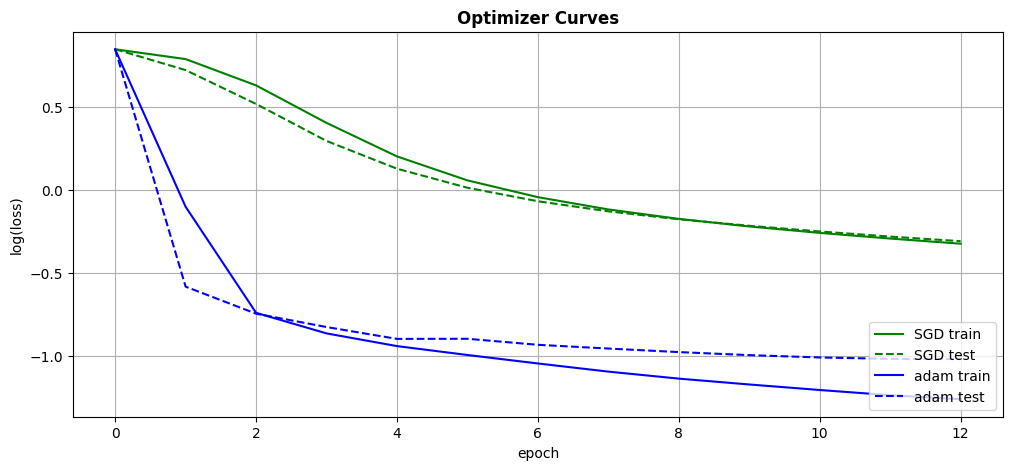

In [31]:
plt.figure(figsize=(12, 5))
colors = ['g', 'b']

num_epochs = 12
batch_size = 1024

epochs = np.arange(num_epochs + 1)

for i, i_optim in enumerate([tf.keras.optimizers.SGD(),
                             tf.keras.optimizers.Adam()]):

    test_model = Sequential([
        Dense(64, input_shape=(28 * 28,), activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='sigmoid')
    ])
    
    test_model.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
   
    h0_train = test_model.evaluate(X_train_scaled_reshaped, y_train_binarized, verbose=0)
    h0_test = test_model.evaluate(X_test_scaled_reshaped, y_test_binarized, verbose=0)

    h = test_model.fit(
        X_train_scaled_reshaped,
        y_train_binarized,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_data=(X_test_scaled_reshaped, y_test_binarized),
        verbose=1
    )

    models[i_optim.get_config()['name']] = test_model

    plt.plot(epochs, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=test_model.optimizer.get_config()['name'] + ' train')
    
    plt.plot(epochs, np.log([h0_test[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=test_model.optimizer.get_config()['name'] + ' test')
    print('=' * 115)

plt.legend(loc='lower right')
plt.title('Optimizer Curves', fontweight='bold')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

#### Вывод по сравнению алгоритмов оптимизации

Алгоритм оптимизации Adam демонстрирует лучшие показатели. На тестовых данных log(loss) оптимизатора Adam ниже log(loss) оптимизатора SGD.

## Матрица ошибок

На примере предсказаний двуслойной модели с 128 нейронами.

In [32]:
y_true = y_test_labels
y_pred = np.argmax(two_layer_model_v128.predict(X_test_scaled_reshaped), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


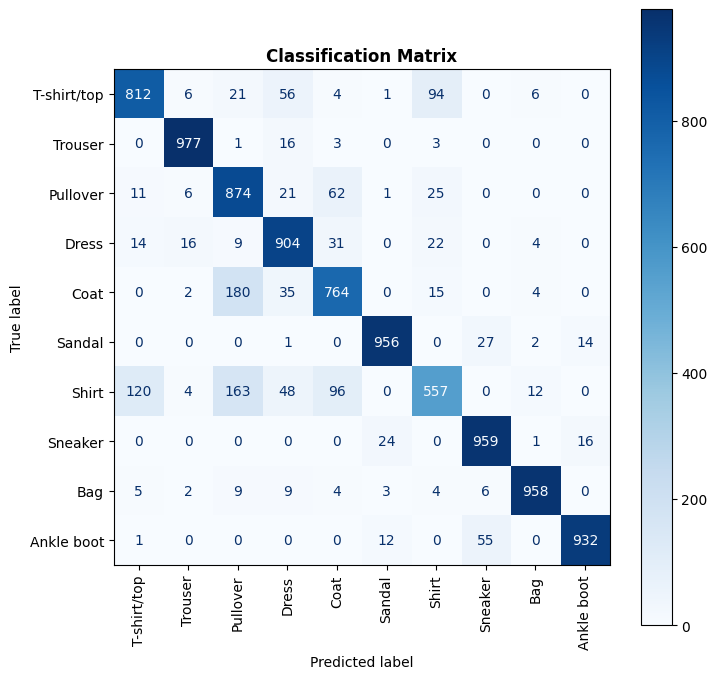

In [33]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'    
]
cm = confusion_matrix(y_true, y_pred)
disp  = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', ax=ax)
plt.xticks(rotation=90)
plt.title('Classification Matrix', fontweight='bold')

plt.show()

In [34]:
report = classification_report(y_true, y_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.81      0.83      1000
     Trouser       0.96      0.98      0.97      1000
    Pullover       0.70      0.87      0.77      1000
       Dress       0.83      0.90      0.87      1000
        Coat       0.79      0.76      0.78      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.77      0.56      0.65      1000
     Sneaker       0.92      0.96      0.94      1000
         Bag       0.97      0.96      0.96      1000
  Ankle boot       0.97      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## Вывод по работе

Усложнение архитектуры модели для текущей задачи классификации не дает значительных преимуществ. Достаточно хорошо, с высокими показателями метрик классификации, отработала двуслойная модель с 128 нейронами. При сопоставлении кривых log(loss) трехслойной модели для оптимизаторов Adam и SGD, Adam демонстрирует лучшие результаты.